In [5]:
import numpy as np
import os
from functools import partial
from transformers import CLIPModel, CLIPImageProcessor
from compute_pretrained_embeddings import get_embeddings
from dataloader import TarImageDataset, custom_collate_fn
from torch.utils.data import DataLoader
from my_utils import load_config

# config = load_config("semdedup_configs.yaml")

model_name = "openai/clip-vit-base-patch32"
tar_files_directory = os.path.abspath("data/raw")
batch_size = 32

# model = CLIPModel.from_pretrained(model_name)
image_processor = CLIPImageProcessor.from_pretrained(model_name)
my_collate_fn = partial(custom_collate_fn, image_processor=image_processor)

dataset_1 = TarImageDataset(tar_dir=tar_files_directory, transform=None)
# dataset_2 = TarImageDataset(tar_dir=tar_files_directory, transform=None)

dataloader_1 = DataLoader(
    dataset_1   , 
    batch_size=batch_size, 
    shuffle=False, 
    collate_fn=my_collate_fn,
    num_workers=0
)

# dataloader_2 = DataLoader(
#     dataset_2, 
#     batch_size=batch_size, 
#     shuffle=False, 
#     collate_fn=my_collate_fn,
#     num_workers=0
# )

# paths_str_type = 'U256' #'S256'
# embed_float_type = 'float32' #'S256'
# emb_memory_loc = config['embs_memory_loc']
# paths_memory_loc = config['path_memory_loc']
# dataset_size = dataset.__len__()
# emb_size = config['emd_size']

# emb_array = np.memmap(
#     emb_memory_loc, 
#     dtype=embed_float_type, 
#     mode='w+', 
#     shape=(dataset_size, emb_size)
# )

# path_array = np.memmap(
#     paths_memory_loc, 
#     dtype=paths_str_type,
#     mode='w+', 
#     shape=(dataset_size,)
# )

/home/fbernardi/miniconda3/envs/semdedup_mio_ipykernel/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:
import torch

In [8]:
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA version PyTorch is built with:", torch.version.cuda)
print("CUDA device count:", torch.cuda.device_count())

PyTorch version: 2.6.0+cu124
CUDA available: True
CUDA version PyTorch is built with: 12.4
CUDA device count: 2


In [9]:
# -- Device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
# -- model
model = model.to(device)
model = model.eval()

cuda


In [2]:
print(
    "\n", dataset_1.__getitem__(0),
    "\n", dataset_1.__getitem__(10),
    "\n", dataset_1.__getitem__(100),
    "\n", dataset_1.__getitem__(1000),
    "\n", dataset_1.__getitem__(10000)
)


 (<PIL.Image.Image image mode=RGB size=140x140 at 0x7B5B2DD0F890>, '000000030012.jpg', 0) 
 (<PIL.Image.Image image mode=RGB size=300x224 at 0x7B5B2DD51880>, '000000030032.jpg', 10) 
 (<PIL.Image.Image image mode=RGB size=120x120 at 0x7B5B2E9F98E0>, '000000030373.jpg', 100) 
 (<PIL.Image.Image image mode=RGB size=512x205 at 0x7B5B2DFFD940>, '000000032242.jpg', 1000) 
 (<PIL.Image.Image image mode=RGB size=128x128 at 0x7B5B2E3E99A0>, '000000019809.jpg', 10000)


In [3]:
print(
    "\n", dataset_2.__getitem__(0),
    "\n", dataset_2.__getitem__(10),
    "\n", dataset_2.__getitem__(100),
    "\n", dataset_2.__getitem__(1000),
    "\n", dataset_2.__getitem__(10000)
    )


 (<PIL.Image.Image image mode=RGB size=140x140 at 0x7B5B2DD51AC0>, '000000030012.jpg', 0) 
 (<PIL.Image.Image image mode=RGB size=300x224 at 0x7B5B2E9C1A90>, '000000030032.jpg', 10) 
 (<PIL.Image.Image image mode=RGB size=120x120 at 0x7B5B2E1D9880>, '000000030373.jpg', 100) 
 (<PIL.Image.Image image mode=RGB size=512x205 at 0x7B5B2E8F1940>, '000000032242.jpg', 1000) 
 (<PIL.Image.Image image mode=RGB size=128x128 at 0x7B5B2EAF59A0>, '000000019809.jpg', 10000)


In [17]:
dataset_1.__len__()

20220

In [7]:
with torch.no_grad():
    for data_batch_1, paths_batch_1, batch_indices_1 in dataloader_1:
        if True:
            break

In [8]:
with torch.no_grad():
    for data_batch_2, paths_batch_2, batch_indices_2 in dataloader_2:
        if True:
            break

In [18]:
ind = 31

(data_batch_1[ind] == data_batch_2[ind]).sum(dim=(0,1,2)) == data_batch_1[ind].shape[0]*data_batch_1[ind].shape[1]*data_batch_1[ind].shape[2]

tensor(True, device='cuda:0')

In [19]:
(data_batch_1[ind] == data_batch_2[ind]).sum(dim=(0,1,2))

tensor(150528, device='cuda:0')

In [11]:
data_batch_1[ind].shape[0]*data_batch_1[ind].shape[1]*data_batch_1[ind].shape[2]

150528

In [26]:
dataloader_1.dataset

TypeError: 'TarImageDataset' object is not callable

In [15]:
paths_batch_1[ind]

'000000030063.jpg'

[`get_image_features`](https://huggingface.co/docs/transformers/en/model_doc/clip#transformers.CLIPModel.get_image_features)

In [11]:
encodings = model.get_image_features(
    pixel_values=data_batch
)

In [12]:
encodings.shape

torch.Size([32, 512])

In [13]:
from torch.nn.functional import normalize

In [14]:
embeds_normalized = normalize(encodings, dim=1)

In [16]:
path_array[batch_indices] = paths_batch

In [17]:
emb_array[batch_indices] = embeds_normalized.cpu().detach().numpy()

In [18]:
emb_array[batch_indices]

array([[-0.02233509, -0.02032149,  0.02072333, ...,  0.09887572,
        -0.00211839, -0.01152895],
       [ 0.00800907,  0.02617006,  0.00255419, ...,  0.03405451,
         0.01636192,  0.00202419],
       [-0.0636093 , -0.01677628,  0.04364581, ...,  0.07423619,
        -0.03214012,  0.00549925],
       ...,
       [ 0.02042953,  0.01727075,  0.00955408, ...,  0.05227413,
        -0.02564773,  0.02683108],
       [-0.02755074,  0.05310895,  0.00985589, ...,  0.06265323,
         0.02549751, -0.00182506],
       [ 0.01792138, -0.0007999 ,  0.02287464, ..., -0.04192063,
         0.01003846,  0.01667938]], dtype=float32)

In [22]:
path_array[batch_indices]

array(['000000000527.jpg', '000000010133.jpg', '000000000084.jpg',
       '000000011394.jpg', '000000010571.jpg', '000000011143.jpg',
       '000000010723.jpg', '000000010278.jpg', '000000010409.jpg',
       '000000010302.jpg', '000000000439.jpg', '000000000519.jpg',
       '000000010795.jpg', '000000010349.jpg', '000000010793.jpg',
       '000000011156.jpg', '000000011020.jpg', '000000000422.jpg',
       '000000000787.jpg', '000000011053.jpg', '000000011151.jpg',
       '000000010932.jpg', '000000000345.jpg', '000000011260.jpg',
       '000000010872.jpg', '000000000739.jpg', '000000010979.jpg',
       '000000000960.jpg', '000000000224.jpg', '000000010368.jpg',
       '000000000979.jpg', '000000000912.jpg'], dtype='<U256')

In [11]:
# file_path = 'data/embeddings/dist_to_cent.npy'
# file_path = '/home/fbernardi/Documents/SemDeDup/data/embeddings/kmeans_centroids.npy'
file_path = '/home/fbernardi/Documents/SemDeDup/data/embeddings/nearest_cent.npy'

print(np.load(file_path),
np.load(file_path).shape)

[273  89  93 ... 197 194  50] (1004,)


In [ ]:
import numpy as np

# Replace 'data.npy' with your actual file name or path
file_path = "/home/fbernardi/Documents/SemDeDup/data/embeddings/embs.npy"
data = np.memmap(
    file_path,
    dtype='float32',
    mode='r',  # read-only
    shape=(dataset_size, emb_size)
)

print("Loaded data:", data)

NameError: name 'dataset_size' is not defined

In [31]:
file_path = "/home/fbernardi/Documents/SemDeDup/data/embeddings/path.npy"
paths_str_type = 'U256'

paths = np.memmap(
    file_path,
    dtype=paths_str_type,
    mode='r',  # read-only
    shape=(dataset_size,)
)

In [34]:
paths.shape

(1004,)

In [27]:
path_array[batch_indices]

NameError: name 'path_array' is not defined

In [1]:
import numpy as np

In [21]:
np.load("/home/fbernardi/Documents/SemDeDup/data/sorted_clusters/cluster_0.npy")

array([['000000014578.jpg', '7318', '0.42452651262283325', '0'],
       ['000000024565.jpg', '17443', '0.41408586502075195', '0'],
       ['000000009357.jpg', '14777', '0.3703886866569519', '0'],
       ...,
       ['000000029482.jpg', '19961', '0.03565037250518799', '0'],
       ['000000027571.jpg', '18993', '0.03555017709732056', '0'],
       ['000000007283.jpg', '13776', '0.03515446186065674', '0']],
      dtype='<U32')

In [7]:
dataset_1.__getitem__(7318)

(<PIL.Image.Image image mode=RGB size=120x90>, '000000014578.jpg', 7318)

In [19]:
np.load("/home/fbernardi/Documents/SemDeDup/data/sorted_clusters/cluster_1.npy")

(258, 4)

In [10]:
np.load("/home/fbernardi/Documents/SemDeDup/data/embeddings/dist_to_cent.npy").shape

(20220,)

In [12]:
np.load("/home/fbernardi/Documents/SemDeDup/data/embeddings/kmeans_centroids.npy").shape

(50, 512)

In [13]:
np.load("/home/fbernardi/Documents/SemDeDup/data/embeddings/nearest_cent.npy")[0]

5

In [15]:
np.load("/home/fbernardi/Documents/SemDeDup/data/sorted_clusters/cluster_5.npy")[:, 1]

array(['19754', '8192', '19923', '20099', '832', '17433', '15756', '7983',
       '14501', '14527', '4584', '3117', '4553', '8824', '15637', '3220',
       '2309', '15277', '11193', '2118', '5342', '17981', '6416', '11627',
       '1462', '7995', '506', '3806', '1966', '12761', '15794', '19500',
       '19173', '13321', '14302', '13734', '9714', '17046', '18889',
       '7431', '7632', '1791', '20152', '8118', '10690', '19999', '18219',
       '19187', '16222', '9007', '12748', '12043', '9886', '8649',
       '11903', '1712', '13606', '6820', '3163', '3233', '12837', '18592',
       '15292', '15781', '9195', '1889', '9243', '18859', '8595', '8876',
       '16390', '8760', '8565', '14408', '16254', '12091', '1515', '7528',
       '15136', '2342', '17362', '15403', '7609', '2982', '3563', '14841',
       '13604', '16819', '17701', '16971', '18742', '10285', '16838',
       '5362', '13202', '9874', '390', '11655', '7418', '17860', '17750',
       '17755', '2613', '43', '20140', '258', '46

In [18]:
np.load("/home/fbernardi/Documents/SemDeDup/data/sorted_clusters/cluster_5.npy")

array([['000000029033.jpg', '19754', '0.4874206781387329', '5'],
       ['000000016171.jpg', '8192', '0.45177751779556274', '5'],
       ['000000029463.jpg', '19923', '0.4120343327522278', '5'],
       ...,
       ['000000026611.jpg', '18501', '0.054352521896362305', '5'],
       ['000000029032.jpg', '19711', '0.05345338582992554', '5'],
       ['000000027647.jpg', '18991', '0.050586581230163574', '5']],
      dtype='<U32')

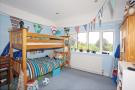

In [53]:
dataset_1.__getitem__(0)[0]

In [51]:
sum(np.load("/home/fbernardi/Documents/SemDeDup/data/embeddings/nearest_cent.npy") == 41)

21

In [22]:
import pandas as pd
import pickle
import numpy as np

In [60]:
with open('/home/fbernardi/Documents/SemDeDup/data/embeddings/kmeans_index.pickle', 'rb') as file:
    kmeans_index = pickle.load(file)


In [23]:
with open('/home/fbernardi/Documents/SemDeDup/data/dataframes/cluster_1.pkl', 'rb') as file:
    pruning_table = pickle.load(file)


In [24]:
pruning_table

,indices,image_id_in_dataset,cluster_url,eps=0.0001,eps=0.001,eps=0.1,eps=0.2,eps=0.3,eps=0.4,eps=0.5
0,257,11763,000000003322.jpg,False,False,False,False,False,False,False
1,256,17689,000000025026.jpg,False,False,False,True,True,True,True
2,255,2503,000000034944.jpg,False,False,False,False,True,True,True
3,254,15552,000000021225.jpg,False,False,False,False,True,True,True
4,253,13255,000000006202.jpg,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...
253,4,6555,000000013119.jpg,False,False,False,False,False,False,True
254,3,14009,000000007859.jpg,False,False,False,False,False,True,True
255,2,18858,000000027348.jpg,False,False,False,False,False,False,True
256,1,2655,000000035086.jpg,False,False,False,False,False,False,True


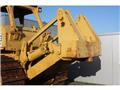

In [32]:
dataloader_1.dataset.__getitem__(13255)[0]

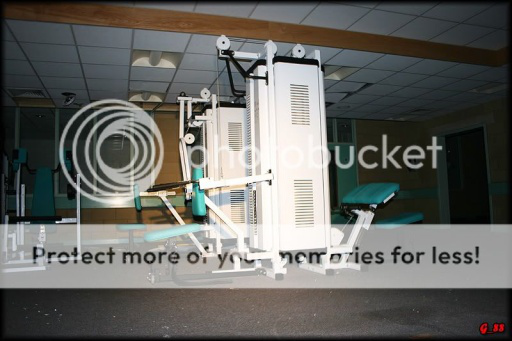

In [33]:
dataloader_1.dataset.__getitem__(6555)[0]

In [15]:
with open('/home/fbernardi/Documents/SemDeDup/data/statistics/dataframes/shard_0.pkl', 'rb') as file:
    shard = pickle.load(file)


In [16]:
shard

,cluster_size,cluster_id,avg_sim_to_cent,std_sim_to_cent,std_pair_w_sim,avg_sim_to_others_list,max_pair_w_sim_list,min_pair_w_sim_list
0,23,1,0.771713,6.235939e-02,tensor(0.0732),"[tensor(0.6528), tensor(0.6392), tensor(0.6346...","[tensor(0.7920), tensor(0.7485), tensor(0.7485...","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
0,15,2,0.768526,4.700727e-02,tensor(0.0803),"[tensor(0.6293), tensor(0.6144), tensor(0.5945...","[tensor(0.8459), tensor(0.8459), tensor(0.7102...","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
0,15,3,0.746363,9.592509e-02,tensor(0.0908),"[tensor(0.6053), tensor(0.6036), tensor(0.5999...","[tensor(0.7129), tensor(0.7684), tensor(0.7684...","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
0,31,4,0.761544,6.007457e-02,tensor(0.0675),"[tensor(0.6500), tensor(0.6221), tensor(0.6181...","[tensor(0.8101), tensor(0.7940), tensor(0.7735...","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
0,30,5,0.811754,8.358292e-02,tensor(0.0798),"[tensor(0.7130), tensor(0.7124), tensor(0.7069...","[tensor(0.8179), tensor(0.8173), tensor(0.8649...","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
0,31,6,0.753913,6.448479e-02,tensor(0.0642),"[tensor(0.6229), tensor(0.6183), tensor(0.6017...","[tensor(0.7255), tensor(0.7060), tensor(0.7127...","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
0,9,7,0.732335,9.266689e-02,tensor(0.0963),"[tensor(0.5693), tensor(0.5516), tensor(0.5290...","[tensor(0.7100), tensor(0.7694), tensor(0.6423...","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."
0,3,8,0.758902,4.128992e-02,tensor(0.0997),"[tensor(0.4140), tensor(0.3767), tensor(0.3010)]","[tensor(0.4897), tensor(0.4897), tensor(0.3382)]","[tensor(0.), tensor(0.), tensor(0.)]"
0,4,9,0.754880,4.461223e-02,tensor(0.1054),"[tensor(0.4959), tensor(0.4348), tensor(0.3965...","[tensor(0.6216), tensor(0.6216), tensor(0.4833...","[tensor(0.), tensor(0.), tensor(0.), tensor(0.)]"
0,51,10,0.729081,6.687310e-02,tensor(0.0580),"[tensor(0.6095), tensor(0.5945), tensor(0.5880...","[tensor(0.8136), tensor(0.7940), tensor(0.7805...","[tensor(0.), tensor(0.), tensor(0.), tensor(0...."


In [34]:
import torch

# Replace 'your_file_path.pt' with the actual path to your .pt file
file_path = '/home/fbernardi/Documents/SemDeDup/data/statistics/dicts/shard_0.pt'

# Load the .pt file
pt_data = torch.load(file_path, weights_only=False)

# Print the loaded data
print(pt_data)


{0.0001:      duplicates_ratio num_duplicates cluster_id
0           28.613139            196          0
1           28.613139            196          0
2           28.613139            196          0
3           28.613139            196          0
4           28.613139            196          0
..                ...            ...        ...
392          0.000000              0         49
393          0.000000              0         49
394          0.000000              0         49
395          0.000000              0         49
396          0.000000              0         49

[20220 rows x 3 columns], 0.001:      duplicates_ratio num_duplicates cluster_id
0           28.905109            198          0
1           28.905109            198          0
2           28.905109            198          0
3           28.905109            198          0
4           28.905109            198          0
..                ...            ...        ...
392          0.000000              0         

In [35]:
pt_data.keys()

dict_keys([0.0001, 0.001, 0.1, 0.2, 0.3, 0.4, 0.5])